## Bank Churn Prediction: Practical Insights into Preprocessing, Model Building, and Predictive Modeling.
In the world of banking, one of the biggest challenges is keeping customers happy and staying with the bank. It's way cheaper to retain existing customers than to acquire new ones. But sometimes, customers decide to leave, and banks want to know why. That's where this project comes in. We're using smart computer methods to figure out when customers might leave.

We start by looking at all the data the bank has collected over time. Then, we clean it up and identify the most important parts. We use data cleaning to ensure the information is accurate and ready for analysis. After that, we employ clever techniques like feature engineering to extract the most useful bits of data. This helps us uncover patterns and trends that might predict if a customer will leave or not.

Once we've got everything prepared, we're building machine learning models using simple but effective methods to predict which customers might leave the bank. But we're not stopping there. We're also testing these models with separate data to ensure their efficiency. By doing all this, we hope to provide banks with the tools they need to keep their customers happy and loyal for the long haul.

### Reading and Analyzing Bank Customer Churn Data.

In [1]:
import pandas as pd

df = pd.read_csv('churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7496,15589541,Sutherland,557,France,Female,27,2,0.00,2,0,1,4497.55,0
7496,7497,15608804,Allan,824,Germany,Male,49,8,133231.48,1,1,1,67885.37,0
7497,7498,15645820,Folliero,698,France,Male,27,7,0.00,2,1,0,111471.55,0
7498,7499,15659031,Mordvinova,630,France,Female,36,8,126598.99,2,1,1,134407.93,0


### Counting Null Values in the Data.

In [2]:
null_values = df.isnull().sum()
null_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Counting Duplicates.
Wow!!! Our dataset does not have any null values. Now, we need to ensure that the data does not contain any duplicates. Checking for duplicate rows is crucial for maintaining data accuracy. Let's go ahead and check for them.

In [3]:
duplicates = duplicates = df.duplicated().sum()
duplicates

0

### Exited Customer Distribution Analysis.
we need to check the distribution of 'Exited' customers in our dataset.

In [4]:
values = df['Exited'].value_counts()
values

0    5954
1    1546
Name: Exited, dtype: int64

### Removing Unnecessary Columns
After found out the distribution. Now, we need to drop irrelevant columns. This action will enhance the clarity

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,557,France,Female,27,2,0.00,2,0,1,4497.55,0
7496,824,Germany,Male,49,8,133231.48,1,1,1,67885.37,0
7497,698,France,Male,27,7,0.00,2,1,0,111471.55,0
7498,630,France,Female,36,8,126598.99,2,1,1,134407.93,0


### Categorizing Dataset Columns.
Now, we're categorizing the columns into numerical and nominal types. This categorization facilitates targeted exploration and manipulation of data based on their respective natures. 

In [6]:
numbCol = ['EstimatedSalary', 'Balance', 'CreditScore', 'Age']
nomCol = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'NumOfProducts', 'Tenure']

print(numbCol)
print(nomCol)

['EstimatedSalary', 'Balance', 'CreditScore', 'Age']
['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'NumOfProducts', 'Tenure']


### Outlier Detection Analysis
We have categorized the columns. Now, we aim to identify outliers within our dataset. By doing this, we can facilitate robust data cleansing and analysis strategies. 

In [7]:
from scipy import stats

# Define the threshold for outlier detection
threshold = 3

# Create a dictionary to store the count of outliers for each column
outlier_counts = {}

# Iterate over each column in the list numbCol containing the names of numerical columns
for column in numbCol:
    # Calculate the Z-scores for the values in the current column
    z_scores = stats.zscore(df[column])
    
    # Identify outliers by comparing the absolute Z-scores against the defined threshold
    outliers = (abs(z_scores) > threshold)
    
    # Count the number of outliers for the current column
    outlier_count = sum(outliers)
    
    # Store the count of outliers for the current column in the outlier_counts dictionary
    outlier_counts[column] = outlier_count


outlier_counts

{'EstimatedSalary': 0, 'Balance': 0, 'CreditScore': 5, 'Age': 99}

### Age Data Integrity Check
We've found outliers in two columns. Before removing them, we need to ensure that it's okay to drop them. Because age can be any number, although we set one limit and check for real outliers. This examination is crucial for maintaining data integrity and reliability in subsequent analyses. 

In [8]:
# Filter the DataFrame for values in the "Age" column greater than 100 and less than 1
ages_check = len(df[(df['Age'] > 100) | (df['Age'] < 1)])

ages_check

0

### Credit Score Data Integrity Check
We have no real outliers in the Age column. Now, we need to check the credit score. Here, our industry knowledge comes into play because the credit score typically ranges from 300 to 900. 

In [9]:
credit_check = len(df[(df['CreditScore'] > 900) | (df['CreditScore'] < 300)])
credit_check

0

### Converting Estimated Salary and Balance to Integer Data Type
There are no real outliers in the credit score column either. Now, we need to change the columns from float to integer values

In [10]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

df['Balance'] = df['Balance'].astype(int)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,502,France,Female,42,8,159660,3,1,0,113931,1
3,699,France,Female,39,1,0,2,0,0,93826,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,557,France,Female,27,2,0,2,0,1,4497,0
7496,824,Germany,Male,49,8,133231,1,1,1,67885,0
7497,698,France,Male,27,7,0,2,1,0,111471,0
7498,630,France,Female,36,8,126598,2,1,1,134407,0


### Label Encoding for Categorical Data
Now, we need to change the words of the categories into numbers.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

lstforle = ['Geography', 'Gender']
for feature in lstforle:
    df[feature] = le.fit_transform(df[feature])

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
4,850,2,0,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,557,0,0,27,2,0,2,0,1,4497,0
7496,824,1,1,49,8,133231,1,1,1,67885,0
7497,698,0,1,27,7,0,2,1,0,111471,0
7498,630,0,0,36,8,126598,2,1,1,134407,0


### Percentage of Churned Customers based on Credit Card Ownership
we need to check how the column relates to the 'Exited' column. This analysis helps us understand how credit card services affect customer retention strategies.

In [12]:
credit_churn_percentage = df.groupby('HasCrCard')['Exited'].mean() * 100
credit_churn_percentage

HasCrCard
0    21.246078
1    20.345417
Name: Exited, dtype: float64

### Removing Credit Card Ownership Column
We found out that credit card services have no impact on customer retention. Let's go ahead and drop the column.

In [13]:
df.drop(columns=['HasCrCard'], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,101348,1
1,608,2,0,41,1,83807,1,1,112542,0
2,502,0,0,42,8,159660,3,0,113931,1
3,699,0,0,39,1,0,2,0,93826,0
4,850,2,0,43,2,125510,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...
7495,557,0,0,27,2,0,2,1,4497,0
7496,824,1,1,49,8,133231,1,1,67885,0
7497,698,0,1,27,7,0,2,0,111471,0
7498,630,0,0,36,8,126598,2,1,134407,0


### Standardizing Numerical Data with StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
sc = StandardScaler()

# Fit StandardScaler to all numerical columns in the training DataFrame
sc.fit(df[numbCol])

# Apply the transformation to all numerical columns in the training DataFrame
df[numbCol] = sc.transform(df[numbCol])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,-0.319190,0,0,0.295670,2,-1.230265,1,1,0.018331,1
1,-0.432858,2,0,0.200198,1,0.111903,1,1,0.213069,0
2,-1.528202,0,0,0.295670,8,1.326687,3,0,0.237233,1
3,0.507485,0,0,0.009254,1,-1.230265,2,0,-0.112526,0
4,2.067833,2,0,0.391141,2,0.779776,1,1,-0.368987,0
...,...,...,...,...,...,...,...,...,...,...
7495,-0.959863,0,0,-1.136407,2,-1.230265,2,1,-1.666549,0
7496,1.799164,1,1,0.963972,8,0.903427,1,1,-0.563812,0
7497,0.497151,0,1,-1.136407,7,-1.230265,2,0,0.194437,0
7498,-0.205522,0,0,-0.277161,8,0.797200,2,1,0.593446,0


### Splitting Data into Features and Target Variable

In [15]:
x1 = df.drop(columns=['Exited'])
y1 = df['Exited']
 
print("Shape of x1 (features):", x1.shape)
print("Shape of y1 (target variable):", y1.shape)

Shape of x1 (features): (7500, 9)
Shape of y1 (target variable): (7500,)


### Oversampling Minority Class with SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
over = SMOTE(sampling_strategy=1)

# Apply SMOTE to oversample the minority class
x1_resampled, y1_resampled = over.fit_resample(x1, y1)
x1_resampled = x1_resampled.values
y1_resampled = y1_resampled.values

print("Shape of x1_resampled (resampled features):", x1_resampled.shape)
print("Shape of y1_resampled (resampled target variable):", y1_resampled.shape)

Shape of x1_resampled (resampled features): (11908, 9)
Shape of y1_resampled (resampled target variable): (11908,)


### Splitting Oversampled Data for Training and Testing

In [17]:
from sklearn.model_selection import train_test_split

# Assuming x1_resampled and y1_resampled are your features and target after oversampling
x_train, x_test, y_train, y_test = train_test_split(x1_resampled, y1_resampled, test_size=0.2, random_state=42)

print("Shape of x_train (training features):", x_train.shape)
print("Shape of x_test (testing features):", x_test.shape)
print("Shape of y_train (training target):", y_train.shape)
print("Shape of y_test (testing target):", y_test.shape)

Shape of x_train (training features): (9526, 9)
Shape of x_test (testing features): (2382, 9)
Shape of y_train (training target): (9526,)
Shape of y_test (testing target): (2382,)


### Model Evaluation: Logistic Regression
We have split the data. Now, we need to build the logistic model and check the accuracy score.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred_lr = logistic_regression.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred_lr)

print("Accuracy score of the logistic regression model:", accuracy1)

Accuracy score of the logistic regression model: 0.7237615449202351


### Model Evaluation: Support Vector Machine (SVM).
We have successfully build the logistic model. Now, we need to build the SVM and check the accuracy score.

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred_svm)
print("Accuracy score of the SVM model:", accuracy2)

Accuracy score of the SVM model: 0.7283795130142737


### Model Evaluation: Random Forest Classifier
Now, we need to build the Random Forest model and check the accuracy score.

In [20]:
from sklearn.ensemble import RandomForestClassifier


rf_Model = RandomForestClassifier()
rf_Model.fit(x_train, y_train)
y_pred = rf_Model.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred)

print("Accuracy score of the Random Forest Classifier model:", accuracy3)

Accuracy score of the Random Forest Classifier model: 0.8795130142737195


### Evaluation Metrics: Precision, Recall, and F1 Score
Since we found better accuracy with the Random Forest Classifier model among the three models we considered, let's proceed to evaluate its performance using other metrics.

In [21]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("precision:",precision)
print("recall:",recall)
print("f1:",f1)

precision: 0.8590057049714751
recall: 0.9023972602739726
f1: 0.8801670146137787


### Hyperparameter Tuning with Randomized Search: Random Forest.
We've obtained the remaining metrics. Now, let's fine-tune the model to improve its performance.

In [22]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ['sqrt', 'log2', None]
max_depth = [None, 10, 20, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Instantiate the RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator=rf_Model, param_distributions=param_grid, cv=5, verbose=0, n_jobs=4, random_state=42)

# Fit the RandomizedSearchCV to the training data
rf_RandomGrid.fit(x_train, y_train)

# Set candidate threshold values
threshold_values = np.arange(0.1, 1.0, 0.05)

best_f1 = 0
best_threshold = 0.5

# Find the optimal threshold
for threshold in threshold_values:
    y_pred_prob = rf_RandomGrid.best_estimator_.predict_proba(x_test)
    y_pred1 = (y_pred_prob[:, 1] > threshold).astype(int)
    f1 = f1_score(y_test, y_pred1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Use the optimal threshold for prediction
y_pred_prob = rf_RandomGrid.best_estimator_.predict_proba(x_test)
y_pred1 = (y_pred_prob[:, 1] > best_threshold).astype(int)

# Calculate evaluation metrics
accuracy4 = accuracy_score(y_test, y_pred1)
precision4 = precision_score(y_test, y_pred1)
recall4 = recall_score(y_test, y_pred1)
f1_4 = f1_score(y_test, y_pred1)

# Display the evaluation metrics
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f1_4)


Accuracy: 0.8824517212426533
Precision: 0.854066985645933
Recall: 0.9169520547945206
F1 Score: 0.8843930635838151


### Feature Importance Analysis: Random Forest Model
We've fine-tuned the model. Now, let's determine the importance of the columns in our dataset.

In [23]:
best_rf_model = rf_RandomGrid.best_estimator_

# Get feature importances if best_rf_model is a tree-based model like RandomForestClassifier
feature_importances = best_rf_model.feature_importances_

# Get feature names from the original DataFrame
feature_names = df.drop(columns=['Exited']).columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
3              Age    0.294848
6    NumOfProducts    0.158725
5          Balance    0.123007
8  EstimatedSalary    0.108360
0      CreditScore    0.102826
7   IsActiveMember    0.070524
4           Tenure    0.065863
1        Geography    0.039761
2           Gender    0.036086


### Loading Holdout Dataset for Churn Prediction

In [30]:
holdout_df = pd.read_csv("holdout_churn.csv")
holdout_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,8001,15629002,Hamilton,747,Germany,Male,36,8,102603.30,2,1,1,180693.61
1,8002,15798053,Nnachetam,707,Spain,Male,32,9,0.00,2,1,0,126475.79
2,8003,15753895,Blue,590,Spain,Male,37,1,0.00,2,0,0,133535.99
3,8004,15595426,Madukwe,603,Spain,Male,57,6,105000.85,2,1,1,87412.24
4,8005,15645815,Mills,615,France,Male,45,5,0.00,2,1,1,164886.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
1996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
1997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
1998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


### Preprocessing Holdout Data for Churn Prediction.
We have our dataset loaded. Now, let's process it before making predictions. 

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Drop specified columns
columns_to_drop = ['HasCrCard', 'RowNumber', 'CustomerId', 'Surname']
holdout_df.drop(columns=columns_to_drop, inplace=True)

# Step 2: Convert 'EstimatedSalary' and 'Balance' columns to integer data types
holdout_df['EstimatedSalary'] = holdout_df['EstimatedSalary'].astype(int)
holdout_df['Balance'] = holdout_df['Balance'].astype(int)

# Step 3: Perform label encoding for selected features
lstforle = ['Geography', 'Gender']  # List of features for label encoding
label_encoders = {}
for feature in lstforle:
    label_encoders[feature] = LabelEncoder()
    holdout_df[feature] = label_encoders[feature].fit_transform(holdout_df[feature])


holdout_df[numbCol] = sc.transform(holdout_df[numbCol])

holdout_df



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,1.003489,1,1,-0.277161,8,0.412920,2,1,1.398666
1,0.590152,2,1,-0.659048,9,-1.230265,2,0,0.455456
2,-0.618860,2,1,-0.181689,1,-1.230265,2,0,0.578276
3,-0.484525,2,1,1.727746,6,0.451308,2,1,-0.224108
4,-0.360524,0,1,0.582085,5,-1.230265,2,1,1.123678
...,...,...,...,...,...,...,...,...,...
1995,1.251492,0,1,0.009254,5,-1.230265,2,0,-0.070009
1996,-1.383534,0,1,-0.372633,10,-0.311501,1,1,0.024438
1997,0.610819,0,0,-0.277161,7,-1.230265,1,1,-1.012644
1998,1.261825,1,1,0.295670,3,-0.027940,2,0,-0.128844


### Making Predictions on Holdout Data
After preprocessing the holdout dataset with StandardScaler to ensure consistency in feature scaling, we utilize the trained Random Forest model to make predictions on the preprocessed holdout data. This step represents a crucial aspect of model evaluation and deployment, as it assesses the model's performance on unseen data, validating its effectiveness in real-world scenarios. 

In [32]:
predictions = rf_RandomGrid.predict(holdout_df.values)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Loading Original Churn Results
Now, let's view the real values for the holdout data. It's essential to inspect the data and check the values.

In [35]:
import pandas as pd
result_df = pd.read_csv('holdout_churn_result.csv')
result_df

,Exited
0,0
1,0
2,0
3,1
4,0
...,...
1995,0
1996,0
1997,1
1998,1


### Evaluating Predictive Model Performance with F1 Score
Now, we aim to evaluate the predicted result with the original values. By doing this, we can assess the performance of the model.

In [36]:
from sklearn.metrics import f1_score

# Assuming 'Exited' column contains the actual labels in result_df DataFrame
actual_labels = result_df['Exited'].values

# Calculate the F1 score
f1_score = f1_score(actual_labels, predictions)

# Display the F1 score
print("F1 Score:", f1_score)


F1 Score: 0.5861635220125786


### Visual Analysis

#### Bar Plot for Exited Customer Distribution Analysis

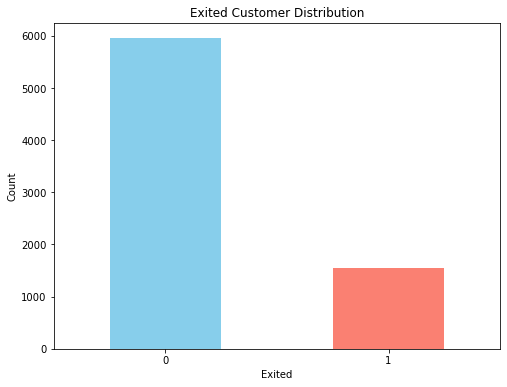

In [40]:
import matplotlib.pyplot as plt

# Plot the distribution of 'Exited' customers
plt.figure(figsize=(8, 6))
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Exited Customer Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### Box Plot for Outlier Detection Analysis

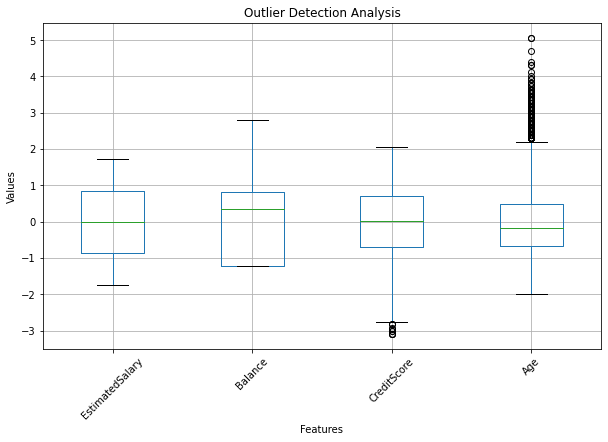

In [41]:

plt.figure(figsize=(10, 6))
df[numbCol].boxplot()
plt.title('Outlier Detection Analysis')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


#### Feature Importance Plot: Visualize the feature importances obtained from the random forest model.

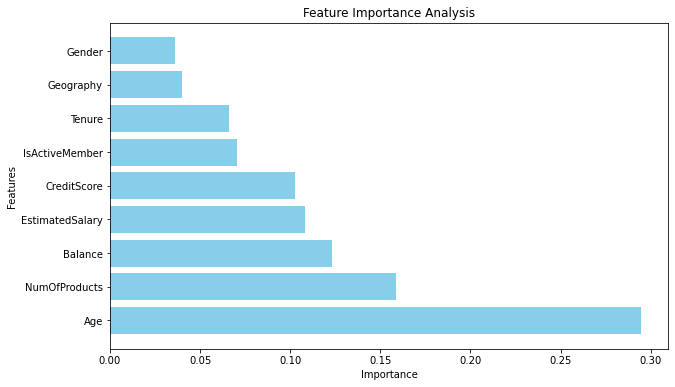

In [42]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()


#### Confusion Matrix Visualization

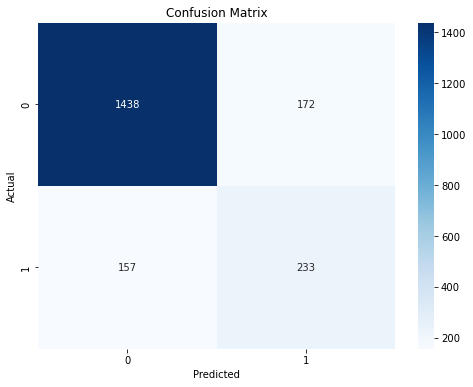

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(actual_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### ROC Curve: Plot the ROC curve to evaluate the model's performance

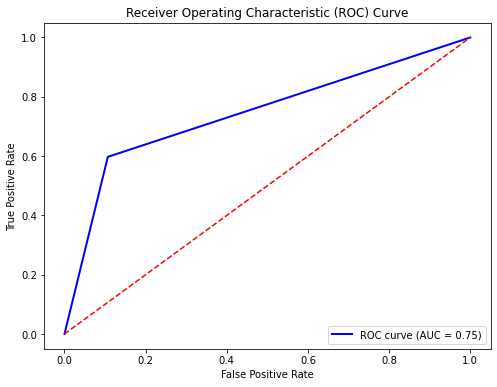

In [44]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
